# DLPy vs SWAT Image Classification Cifar10

The CIFAR-10 data set consists of 10,000 32x32 color images with 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). In this demonstration, a convolutional neural network is built and trained to classify images into the 10 possible classes.

![title](cifar10_sample.png)

# Load Packages

In [1]:
import swat
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
swat.options.cas.print_messages = True
import dlpy
from dlpy.images import ImageTable
from dlpy.splitting import two_way_split
from dlpy.splitting import three_way_split
from dlpy import Sequential
from dlpy.model import *
from dlpy.layers import * 
from dlpy.applications import *
from dlpy.model import Solver
from dlpy import utils
from dlpy.model import Optimizer

# Connect to CAS

In [2]:
conn = swat.CAS("server", 8777, "student", "Metadata0", protocol="http")

# Load Images

In [3]:
my_images = ImageTable.load_files(conn=conn, path='/workshop/winsas/VOSI/cifar10', casout=dict(name='cifar10'))

In [4]:
# conn.table.addCaslib(name="mycl", path="/workshop/winsas/VOSI", subDirectories = True, dataSource="PATH", activeOnAdd=False)

In [5]:
# conn.loadActionSet('image')
# actions = conn.builtins.help(actionSet='image')

In [6]:
# conn.image.loadImages(
#     caslib='mycl',
#     path='cifar10',
#     recurse=True, 
#     decode=True,
#     distribution="random", 
#     labelLevels=1,
#     casout=dict(name='cifar10', blocksize='128',replace=True)
# )

# View the Data

In [7]:
conn.table.tableinfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,CIFAR10,10000,4,0,utf-8,2024-09-06T14:15:21-04:00,2024-09-06T14:15:21-04:00,2024-09-06T14:15:21-04:00,UTF8,2.041266e+09,...,0,0,0,,,0,student,,,NaN


In [8]:
my_images.head()

,_image_,_label_,_filename_0,_id_
0,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,bird,img3733.png,2325
1,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,bird,img3737.png,2326
2,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,bird,img374.png,2327
3,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,dog,img9138.png,5907
4,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,bird,img3741.png,2328


In [9]:
my_images.columninfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,_image_,,1,varbinary(image),2955,2955,,0,0
1,_label_,,2,varchar,10,10,,0,0
2,_filename_0,,3,varchar,11,11,,0,0
3,_id_,,4,int64,8,12,,0,0


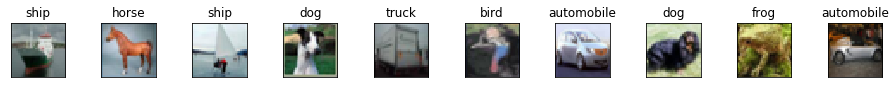

In [10]:
my_images.show(nimages=10, ncol=10, randomize=True)

In [11]:
# conn.loadActionSet('simple')
# actions = conn.builtins.help(actionSet='simple')

In [12]:
# conn.simple.freq(
#     table = 'cifar10',
#     inputs = '_label_'
# )['Frequency']

In [13]:
my_images.label_freq

,Level,Frequency
airplane,1,1000
automobile,2,1000
bird,3,1000
cat,4,1000
deer,5,1000
dog,6,1000
frog,7,1000
horse,8,1000
ship,9,1000
truck,10,1000


In [14]:
#conn.image.summarizeImages(imagetable='cifar10')

In [15]:
my_images.image_summary

jpg                 10000
minWidth               32
maxWidth               32
minHeight              32
maxHeight              32
meanWidth              32
meanHeight             32
mean1stChannel    114.854
min1stChannel           0
max1stChannel         255
mean2ndChannel    123.709
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    126.025
min3rdChannel           0
max3rdChannel         255
dtype: object

# Shuffle the Data

In [16]:
# conn.table.shuffle(
#     table = 'cifar10',
#     casOut = dict(name='cifar10', replace=True)
# )

In [17]:
my_images.shuffle(casout=dict(name='cifar10', replace=True))

[caslib]

 'CASUSER(student)'

[tableName]

 'CIFAR10'

[casTable]

 CASTable('CIFAR10', caslib='CASUSER(student)')

+ Elapsed: 0.0684s, user: 0.0378s, sys: 0.0639s, mem: 50.5mb

# Partition the Data

In [18]:
# conn.loadActionSet('sampling')
# actions = conn.builtins.help(actionSet='sampling')

In [19]:
# conn.sampling.srs(
#     table = 'cifar10',
#     samppct = 80,
#     samppct2 = 20,
#     seed = 802,
#     partind = True,
#     output  = dict(casOut = dict(name = 'cifar10', replace = True), copyVars = 'ALL')
# )

In [20]:
train, validate, test = three_way_split(my_images, valid_rate=10, test_rate=10, seed=12345)
len(train), len(validate), len(test)

(8000, 1000, 1000)

# Build the Model

In [21]:
# conn.loadActionSet('deepLearn')
# actions = conn.builtins.help(actionSet='deepLearn')

In [22]:
# # Build a model shell
# conn.deepLearn.buildModel(
#     model = dict(name='ConVNN',replace=True),
#     type = 'CNN'
# )

# # Add an input layer 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='data',
#       layer=dict(type='input', nchannels=3, width=32, height=32, randomFlip='H', randomMutation='Random', 
#              offsets=(113.852228,123.021097,125.294747))
# )

# # Add several Convolutional layers 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='ConVLayer1a', 
#       layer=dict(type='CONVO', nFilters=12,  width=1, height=1, stride=1, act='ELU'), srcLayers=('data')
# )

# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='ConVLayer1b',
#       layer=dict(type='CONVO', nFilters=12, width=3, height=3, stride=1, act='ELU'), srcLayers=('data')
# )
        
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='ConVLayer1c',
#       layer=dict(type='CONVO', nFilters=12,  width=5, height=5, stride=1, act='ELU'), srcLayers=('data')
# )
        
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='ConVLayer1d',
#       layer=dict(type='CONVO', nFilters=12, width=7, height=7, stride=1, act='ELU'), srcLayers=('data')
# )
        
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='ConVLayer1e',
#       layer=dict(type='CONVO', nFilters=16, width=4, height=4, stride=2, dropout=.2, act='ELU'), srcLayers=('data')
# )
        
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='ConVLayer1f', 
#       layer=dict(type='CONVO', nFilters=16, width=6, height=6, stride=4, dropout=.25, act='ELU'), srcLayers=('data')
# )

# # Add a concatenation  layer 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='concatlayer1a',
#       layer=dict(type='concat'), srcLayers=('ConVLayer1a','ConVLayer1b','ConVLayer1c','ConVLayer1d')
# )

# # Add a max pooling layer 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='PoolLayer1max', 
#       layer=dict(type='POOL', width=2, height=2, stride=2, pool='max'), srcLayers=('concatlayer1a')
# )

# # Add a concatenation  layer 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='concatlayer2', 
#       layer=dict(type='concat'), srcLayers=('PoolLayer1max','ConVLayer1e') 
# )

# # Add a max pooling layer 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='PoolLayer2max', 
#       layer=dict(type='POOL', width=2, height=2, stride=2, pool='max'), srcLayers=('concatlayer2')
# )

# # Add a concatenation  layer 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='concatlayer3', 
#       layer=dict(type='concat'), srcLayers=('PoolLayer2max','ConVLayer1f')
# )

# # Add a max pooling layer 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='PoolLayer3max', 
#       layer=dict(type='POOL', width=2, height=2, stride=2, pool='max'), srcLayers=('concatlayer3')
# )

# # Add a Convolutional layer with 64, 3 by 3 filters, a stride of 2 and batch normalization 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='ConVLayer2a', 
#       layer=dict(type='CONVO', nFilters=64, width=3, height=3, stride=2, act='Identity', includeBias=False), 
#              srcLayers=('concatlayer3')
# )
        
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='BatchLayer2a', 
#       layer=dict(type='BATCHNORM', act='ELU'), srcLayers=('ConVLayer2a') 
# )

# # Add a Convolutional layer with 64, 1 by 1 filters, a stride of 1 and batch normalization 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='ConVLayer2b', 
#       layer=dict(type='CONVO', nFilters=64, width=1, height=1, stride=1, act='Identity', includeBias=False), 
#              srcLayers=('concatlayer3')
# )
        
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='BatchLayer2b',
#       layer=dict(type='BATCHNORM', act='ELU'), srcLayers=('ConVLayer2b')
# )

# # Add a Convolutional layer with 64, 3 by 3 filters, a stride of 1 and batch normalization 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='ConVLayer3a', 
#       layer=dict(type='CONVO', nFilters=64, width=3, height=3, stride=1, init='msra', act='Identity', includeBias=False), 
#              srcLayers=('BatchLayer2b')
# )

# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='BatchLayer3a', 
#       layer=dict(type='BATCHNORM', act='ELU'), srcLayers=('ConVLayer3a')
# )

# # Add a Convolutional layer with Batch Normalization 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='ConVLayer3b', 
#       layer=dict(type='CONVO', nFilters=64, width=5, height=5, stride=1, init='msra', act='Identity', includeBias=False),
#              srcLayers=('BatchLayer2b') 
# )

# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='BatchLayer3b', 
#       layer=dict(type='BATCHNORM', act='ELU'), srcLayers=('ConVLayer3b')
# )

# # Add a concatenation  layer 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='concatlayer4', 
#       layer=dict(type='concat'), srcLayers=('BatchLayer3a','BatchLayer3b')
# )

# # Add a Convolutional layer with Batch Normalization 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='ConVLayer4', 
#       layer=dict(type='CONVO', nFilters=128, width=3, height=3, stride=2, init='msra2', act='Identity', includeBias=False), 
#              srcLayers=('concatlayer4') 
# )

# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='BatchLayer4', 
#       layer=dict(type='BATCHNORM', act='ELU'), srcLayers=('ConVLayer4') 
# )

# # Add a concatenation  layer 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='concatlayer5', 
#       layer=dict(type='concat'), srcLayers=('PoolLayer3max','BatchLayer4','BatchLayer2a')

# )

# # Add a Convolutional layer with Batch Normalization 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='ConVLayerLasta',
#       layer=dict(type='CONVO', nFilters=500, width=1, height=1, stride=1, init='msra2', act='Identity', includeBias=False), 
#              srcLayers=('concatlayer5')
# )

# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='BatchLayerLasta', 
#       layer=dict(type='BATCHNORM', act='ELU'), srcLayers=('ConVLayerLasta')
# )

# # Add a fully-connected layer with Batch Normalization 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='FCLayer1', 
#       layer=dict(type='FULLCONNECT', n=540, act='Identity', init='msra2', includeBias=False), srcLayers=('BatchLayerLasta') 
# )

# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='BatchLayerFC1', 
#       layer=dict(type='BATCHNORM', act='ELU'), srcLayers=('FCLayer1')
# )

# # Add a fully-connected layer with Batch Normalization 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='FCLayer2', 
#       layer=dict(type='FULLCONNECT', n=540, act='Identity', init='msra2', dropout=.7, includeBias=False),  
#              srcLayers=('BatchLayerFC1')
# )
        
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='BatchLayerFC2', 
#       layer=dict(type='BATCHNORM', act='ELU'), srcLayers=('FCLayer2')
# )

# # Add an output layer with softmax activation 
# conn.deepLearn.addLayer(
#     model = 'ConVNN', replace=True, name='outlayer', 
#       layer=dict(type='output', act='SOFTMAX'), srcLayers=('BatchLayerFC2')
# )

# conn.deepLearn.modelInfo(
#     model='ConVNN'
# )

In [23]:
# Define the Input Images
input1 = Input(n_channels=3, width=32, height=32, random_flip='H', random_mutation='Random', offsets=(113.852228,123.021097,125.294747))

# Create 6 convolutional layers
conv1a = Conv2d(act='elu', n_filters=12, width=1, height=1, stride=1)(input1)
conv1b = Conv2d(act='elu', n_filters=12, width=3, height=3, stride=1)(input1)
conv1c = Conv2d(act='elu', n_filters=12, width=5, height=5, stride=1)(input1)
conv1d = Conv2d(act='elu', n_filters=12, width=7, height=7, stride=1)(input1)
conv1e = Conv2d(act='elu', n_filters=16, width=4, height=4, stride=2, dropout=0.2)(input1)
conv1f = Conv2d(act='elu', n_filters=16, width=6, height=6, stride=4, dropout=0.25)(input1)

# Concat first four convolutions and pool
concat1 = Concat()([conv1a, conv1b, conv1c, conv1d])
pool1max = Pooling(width=2, height=2, stride=2, pool='max')(concat1)

# Concat fifth convolution and pool
concat2 = Concat()([pool1max, conv1e])
pool2max = Pooling(width=2, height=2, stride=2, pool='max')(concat2)

# Concat sixth convolution and pooling output
concat3 = Concat()([pool2max, conv1f])

# Path 1
pool3max = Pooling(width=2, height=2, stride=2, pool='max')(concat3)

# Path 2
conv2a = Conv2d(act='identity', include_bias=False, n_filters=64, width=3, height=3, stride=2)(concat3)
batchnorm2a = BatchNormalization(act='elu')(conv2a)

# Path 3
conv2b = Conv2d(act='identity', include_bias=False, n_filters=64, width=1, height=1, stride=1)(concat3)
batchnorm2b = BatchNormalization(act='elu')(conv2b)

conv3a = Conv2d(act='identity', include_bias=False, n_filters=64, width=3, height=3, stride=1)(batchnorm2b)
batchnorm3a = BatchNormalization(act='elu')(conv3a)

conv3b = Conv2d(act='identity', include_bias=False, n_filters=64, width=5, height=5, stride=1)(batchnorm2b)
batchnorm3b = BatchNormalization(act='elu')(conv3b)

concat4 = Concat()([batchnorm3a, batchnorm3b])

conv4 = Conv2d(act='identity', include_bias=False, n_filters=128, width=3, height=3, stride=2)(concat4)
batchnorm4 = BatchNormalization(act='elu')(conv4)

# Concat output from paths 1-3
concat5 = Concat()([pool3max, batchnorm4, batchnorm2a])

# Final Convolution
convlast = Conv2d(act='identity', include_bias=False, n_filters=500, width=1, height=1, stride=1)(concat5)
batchnormlast = BatchNormalization(act='elu')(convlast)

# Dense Layers
fc1 = Dense(n=540, act='identity', include_bias=False)(batchnormlast)
batchnormfc1 = BatchNormalization(act='elu')(fc1)
fc2 = Dense(n=540, act='identity', include_bias=False, dropout=0.7)(batchnormfc1)
batchnormfc2 = BatchNormalization(act='elu')(fc2)

# Define Output
output1 = OutputLayer(n=10, act='softmax')(batchnormfc2)

In [24]:
func_cnn_model = Model(conn, inputs=input1, outputs=output1)
func_cnn_model.compile()
func_cnn_model.print_summary()

NOTE: Model compiled successfully.


,Layer Id,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters,FLOPS(forward pass)
0,0,InputLayer_1,input,,,None,"(32, 32, 3)","(0, 0)",0
1,1,Conv2d_1,convo,"(1, 1)","(1, 1)",Elu,"(32, 32, 12)","(36, 12)",36864
2,2,Conv2d_2,convo,"(3, 3)","(1, 1)",Elu,"(32, 32, 12)","(324, 12)",331776
3,3,Conv2d_3,convo,"(5, 5)","(1, 1)",Elu,"(32, 32, 12)","(900, 12)",921600
4,4,Conv2d_4,convo,"(7, 7)","(1, 1)",Elu,"(32, 32, 12)","(1764, 12)",1806336
5,5,Concat_1,concat,,,Auto,"(32, 32, 48)","(0, 0)",0
6,6,Pooling_1,pool,"(2, 2)","(2, 2)",Max,"(16, 16, 48)","(0, 0)",0
7,7,Conv2d_5,convo,"(4, 4)","(2, 2)",Elu,"(16, 16, 16)","(768, 16)",196608
8,8,Concat_2,concat,,,Auto,"(16, 16, 64)","(0, 0)",0
9,9,Pooling_2,pool,"(2, 2)","(2, 2)",Max,"(8, 8, 64)","(0, 0)",0


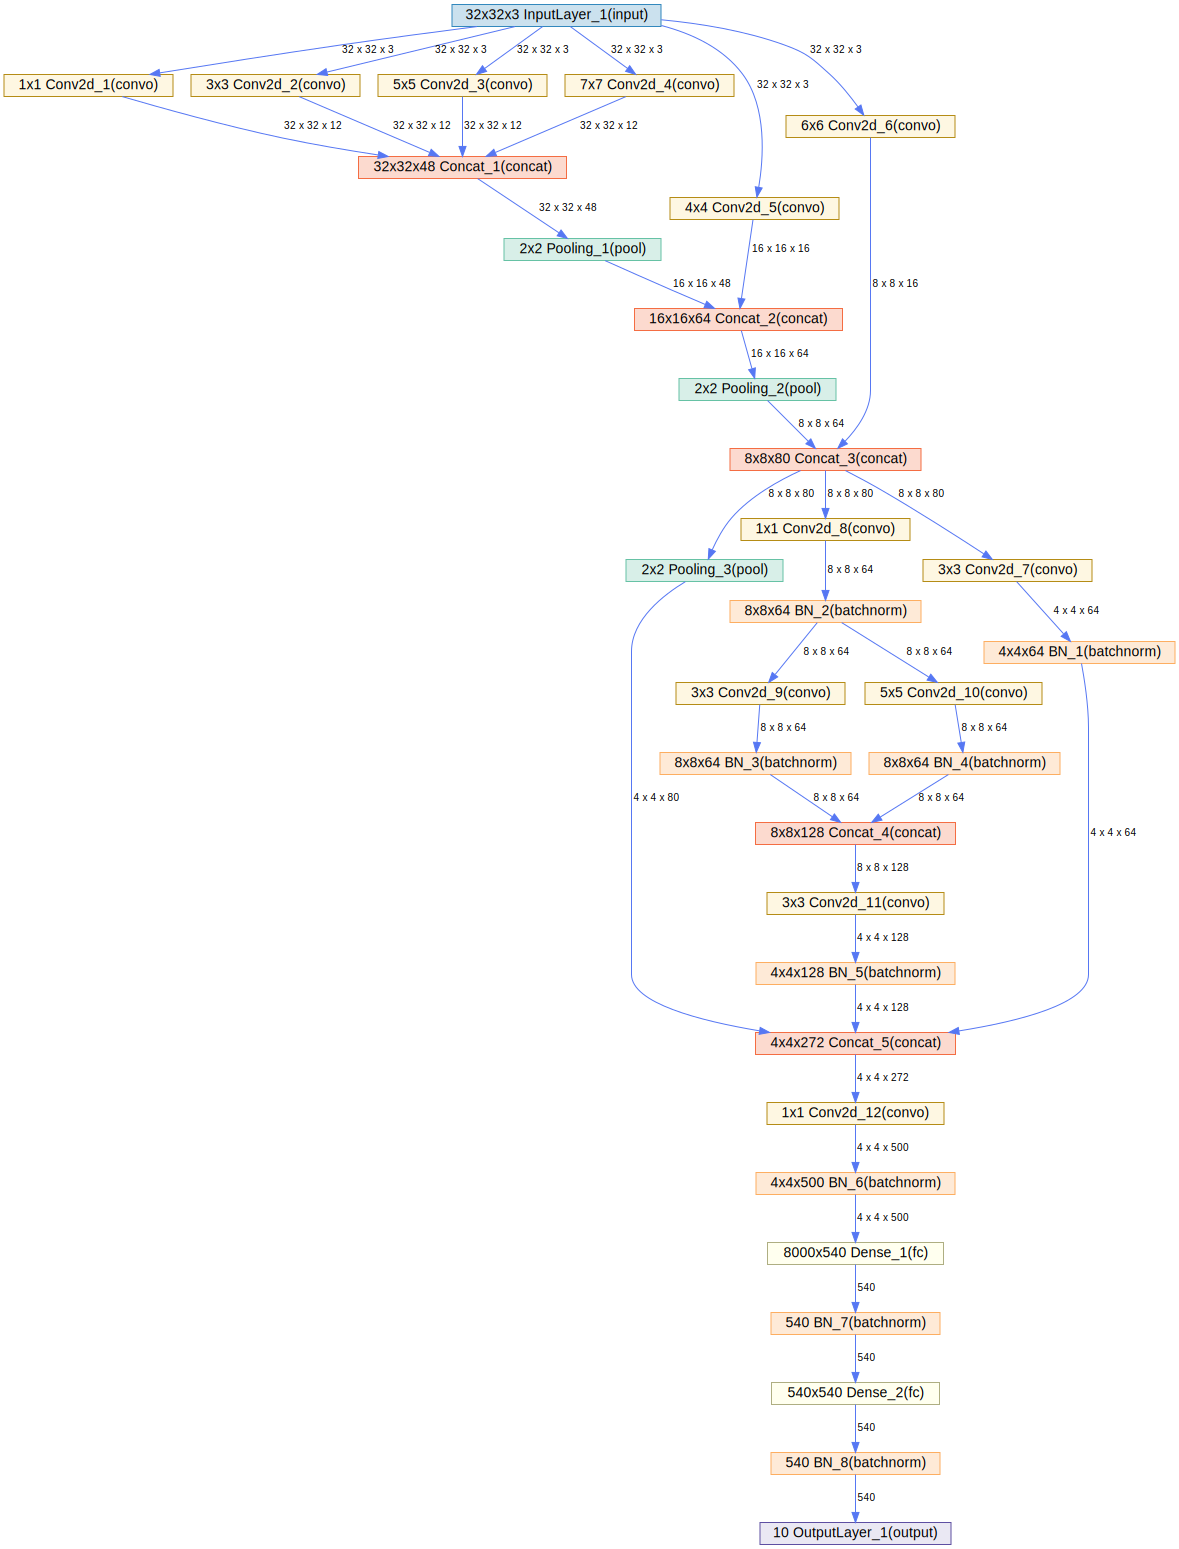

In [25]:
func_cnn_model.plot_network()

# Train the Model

In [26]:
# r1 = conn.deepLearn.dlTrain(
#     modelTable = 'ConVNN',
#     table = dict(name='LargeImageDatashuffled', where='_PartInd_=1'),
#     validTable = dict(name='LargeImageDatashuffled', where='_PartInd_=2'),
#     modelWeights = dict(name='ConVTrainedWeights_d', replace=True),
#     bestweights = dict(name='ConVbestweights', replace=True),
#     target = '_label_',
#     inputs = '_image_',
#     nominals = '_label_',
#     seed = '12345',
#     #GPU=True,
#     optimizer = dict(minibatchsize=80, maxepochs=60,
#                      algorithm=dict(method='ADAM', lrpolicy='Step', gamma=0.6, stepsize=10,
#                                     beta1=0.9, beta2=0.999, learningrate=.01))
# )

# # Plotting training and validation error
# r1.OptIterHistory[['FitError', 'ValidError']][0:].plot(figsize=(12,5))
# ax = plt.gca()
# ax.get_xaxis().set_tick_params(labelsize=14)
# ax.get_yaxis().set_tick_params(labelsize=14)
# ax.legend(['Fit Error', 'Valid Error'], loc='upper right', prop={'size': 14})
# ax.set_xlabel('Iterations',fontsize=16)
# ax.set_ylabel('Loss',fontsize=16)

In [27]:
my_solver = AdamSolver(beta1=0.9, beta2=0.999, learning_rate=0.01, learning_rate_policy='step', gamma=0.6, step_size=10)

In [28]:
epochs = 60
my_opt = Optimizer(algorithm=my_solver, max_epochs=epochs, mini_batch_size=80)

In [29]:
func_cnn_model_info = func_cnn_model.fit(data=train, valid_table=validate, 
                                         target='_label_', inputs='_image_', nominals='_label_',
                                         log_level=2, train_from_scratch=True, optimizer=my_opt)

NOTE: Training from scratch.


In [30]:
func_cnn_model_info['OptIterHistory']

,Epoch,LearningRate,Loss,FitError,ValidLoss,ValidError
0,1,0.010000,2.327024,0.783705,2.629529,0.770
1,2,0.010000,1.889634,0.692076,1.952936,0.680
2,3,0.010000,1.698096,0.632924,1.699923,0.606
3,4,0.010000,1.617655,0.599107,1.712925,0.623
4,5,0.010000,1.557612,0.571429,1.803306,0.623
5,6,0.010000,1.475956,0.554018,1.690545,0.552
6,7,0.010000,1.404886,0.518304,1.440374,0.502
7,8,0.010000,1.345648,0.490067,1.453767,0.533
8,9,0.010000,1.331866,0.489286,1.625590,0.532
9,10,0.010000,1.281336,0.472768,1.748502,0.570


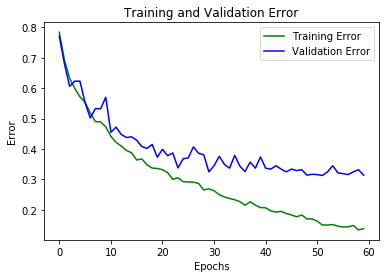

In [31]:
train_error = func_cnn_model_info['OptIterHistory']['FitError']
valid_error = func_cnn_model_info['OptIterHistory']['ValidError']
func_cnn_model_info['OptIterHistory']['ValidError']
epochs = range(epochs)
plt.plot(epochs, train_error, 'g', label='Training Error')
plt.plot(epochs, valid_error, 'b', label='Validation Error')
plt.title('Training and Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

# Score the Model

In [32]:
# conn.deepLearn.dlScore(
#     model='ConVNN',
#     table = dict(name='SmallImageDatashuffled'),
#     initWeights = 'ConVbestweights',
#     copyVars = ['_label_','_image_'],
#     layerImageType = 'jpg',
#     gpu = True,
#     encodename = True,
#     casout = dict(name='ScoredData', replace=True)
# )

In [33]:
scored_info = func_cnn_model.evaluate(test, use_best_weights=True)
scored_table = scored_info['OutputCasTables']['Name'][0]
scored_info['ScoreInfo']

,Descr,Value
0,Number of Observations Read,1000
1,Number of Observations Used,1000
2,Misclassification Error (%),34.6
3,Loss Error,1.271084


In [34]:
func_cnn_model.valid_conf_mat

,_label_,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,airplane,59.0,0.0,9.0,3.0,6.0,2.0,4.0,1.0,10.0,6.0
1,automobile,1.0,70.0,0.0,1.0,0.0,0.0,4.0,2.0,4.0,18.0
2,bird,8.0,1.0,42.0,9.0,12.0,8.0,8.0,11.0,1.0,0.0
3,cat,2.0,0.0,4.0,48.0,9.0,17.0,10.0,8.0,0.0,2.0
4,deer,0.0,1.0,5.0,9.0,62.0,5.0,9.0,9.0,0.0,0.0
5,dog,0.0,0.0,2.0,20.0,8.0,59.0,3.0,7.0,1.0,0.0
6,frog,0.0,0.0,6.0,3.0,8.0,1.0,80.0,0.0,2.0,0.0
7,horse,2.0,0.0,1.0,4.0,6.0,9.0,2.0,76.0,0.0,0.0
8,ship,3.0,2.0,2.0,0.0,1.0,0.0,1.0,3.0,85.0,3.0
9,truck,3.0,9.0,0.0,2.0,0.0,1.0,2.0,3.0,7.0,73.0


# Analyze Results Locally

In [35]:
conn.loadActionSet('simple')
actions = conn.builtins.help(actionSet='simple')

NOTE: Added action set 'simple'.
NOTE: Information for action set 'simple':
NOTE:    simple
NOTE:       mdSummary - Calculates multidimensional summaries of numeric variables
NOTE:       numRows - Shows the number of rows in a Cloud Analytic Services table
NOTE:       summary - Generates descriptive statistics of numeric variables such as the sample mean, sample variance, sample size, sum of squares, and so on
NOTE:       correlation - Computes Pearson product-moment correlations.
NOTE:       regression - Performs a linear regression up to 3rd-order polynomials
NOTE:       crossTab - Performs one-way or two-way tabulations
NOTE:       distinct - Computes the distinct number of values of the variables in the variable list
NOTE:       topK - Returns the top-K and bottom-K distinct values of each variable included in the variable list based on a user-specified ranking order
NOTE:       groupBy - Builds BY groups in terms of the variable value combinations given the variables in the variab

In [36]:
conn.table.fetch(scored_table, to=5)

,_image_,_label_,_filename_0,_id_,P__label_airplane,P__label_automobile,P__label_bird,P__label_cat,P__label_deer,P__label_dog,P__label_frog,P__label_horse,P__label_ship,P__label_truck,I__label_,_DL_PredP_,_DL_PredLevel_
0,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,deer,img8058.png,4803,1.767152e-03,8.847232e-06,0.000257,0.000340,0.078523,0.001338,0.000010,0.916861,0.000002,8.925265e-04,horse,0.916861,7.0
1,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,bird,img3473.png,2287,2.590322e-04,1.807987e-09,0.986585,0.002261,0.001743,0.003169,0.000810,0.005158,0.000015,4.799472e-08,bird,0.986585,2.0
2,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,truck,img9884.png,9995,6.558000e-04,5.170560e-01,0.000582,0.000036,0.001736,0.000021,0.000025,0.000040,0.458579,2.126938e-02,automobile,0.517056,1.0
3,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,cat,img3073.png,3223,6.790563e-09,7.672169e-07,0.000013,0.315100,0.000604,0.684158,0.000110,0.000001,0.000013,6.825227e-07,dog,0.684158,5.0
4,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,deer,img5848.png,4554,5.391329e-06,2.616655e-07,0.000005,0.471661,0.245642,0.208140,0.014837,0.059668,0.000006,3.520923e-05,cat,0.471661,3.0


In [37]:
crosstab = conn.simple.crossTab(
    table = scored_table,
    row = '_label_',
    col = 'I__label_'
)['Crosstab']

crosstab = crosstab.drop('_label_',1)

In [38]:
correct = pd.DataFrame(np.diagonal(crosstab)) / pd.DataFrame(crosstab.sum(axis=1))
miss = 1-correct
classes = pd.DataFrame(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

df = pd.concat([classes, correct, miss], axis=1)
df.columns = ['Label','Correct','Misclassified']
df

,Label,Correct,Misclassified
0,airplane,0.59,0.41
1,automobile,0.70,0.30
2,bird,0.42,0.58
3,cat,0.48,0.52
4,deer,0.62,0.38
5,dog,0.59,0.41
6,frog,0.80,0.20
7,horse,0.76,0.24
8,ship,0.85,0.15
9,truck,0.73,0.27


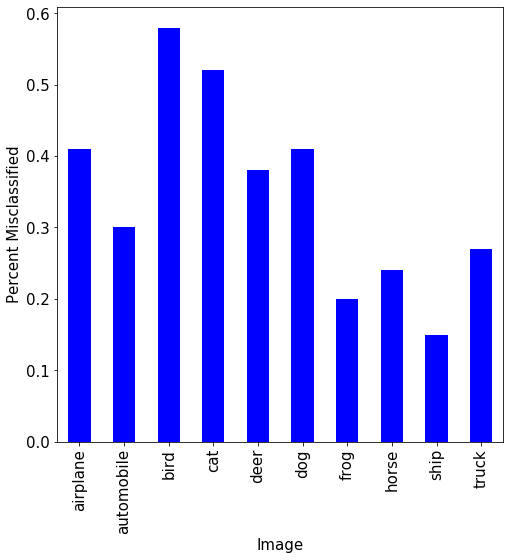

In [39]:
MisPlot = df.plot(x='Label', y='Misclassified', kind='bar', figsize=(8,8), fontsize=15, color='blue')
MisPlot.set_xlabel('Image', fontsize=15)
MisPlot.set_ylabel('Percent Misclassified', fontsize=15)
MisPlot.legend_.remove()
plt.show()

# View Tables

In [40]:
conn.table.tableInfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,CIFAR10,10000,4,0,utf-8,2024-09-06T14:15:25-04:00,2024-09-06T14:15:25-04:00,2024-09-06T14:15:27-04:00,UTF8,2.041266e+09,...,0,0,0,,,0,student,,,NaN
1,TRAIN_ZLY1IQ,8000,4,0,utf-8,2024-09-06T14:15:28-04:00,2024-09-06T14:15:28-04:00,2024-09-06T14:15:38-04:00,UTF8,2.041266e+09,...,0,0,0,,,0,student,,,NaN
2,VALID_ASA4CU,1000,4,0,utf-8,2024-09-06T14:15:28-04:00,2024-09-06T14:15:28-04:00,2024-09-06T14:15:38-04:00,UTF8,2.041266e+09,...,0,0,0,,,0,student,,,NaN
3,TEST_UBT418,1000,4,0,utf-8,2024-09-06T14:15:29-04:00,2024-09-06T14:15:29-04:00,2024-09-06T14:22:54-04:00,UTF8,2.041266e+09,...,0,0,0,,,0,student,,,NaN
4,MODEL_IKQNN9,382,5,0,utf-8,2024-09-06T14:15:38-04:00,2024-09-06T14:15:38-04:00,2024-09-06T14:22:54-04:00,UTF8,2.041266e+09,...,0,0,0,,,0,student,,,NaN
5,MODEL_IKQNN9_WEIGHTS,5104386,3,0,utf-8,2024-09-06T14:22:53-04:00,2024-09-06T14:22:53-04:00,2024-09-06T14:22:54-04:00,UTF8,2.041266e+09,...,0,0,0,,,0,student,,,NaN
6,VALID_RES_CBAQXF,1000,17,0,utf-8,2024-09-06T14:22:54-04:00,2024-09-06T14:22:54-04:00,2024-09-06T14:22:56-04:00,UTF8,2.041266e+09,...,0,0,0,,,0,student,,,NaN


# End the Session

In [41]:
conn.session.endSession()

+ Elapsed: 0.000244s, user: 0.000223s, mem: 0.203mb